In [9]:
import pandas as pd
import matplotlib.pyplot as plt

student_info = pd.read_excel("./students_info.xlsx")
results = pd.read_html("./results_ejudge.html")[0].rename(columns={"User" : "login"})
results

,Place,login,A,B,C,D,E,F,G,H,Solved,Score
0,1,r0300205,9.0,10.0,19.0,20.0,20.0,30.0,30.0,49.0,8,187
1,2,r0300206,10.0,3.0,20.0,20.0,20.0,30.0,30.0,49.0,7,182
2,3,r0300508,10.0,10.0,20.0,20.0,20.0,30.0,29.0,NaN,7,139
3,4,r0300314,9.0,9.0,20.0,20.0,20.0,30.0,9.0,20.0,6,137
4,5,r0300209,8.0,10.0,14.0,20.0,20.0,30.0,0.0,30.0,5,132
...,...,...,...,...,...,...,...,...,...,...,...,...
124,75-129,r0300806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
125,75-129,r0300812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
126,75-129,s1393305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
127,75-129,s1393410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [10]:
student_info

,login,group_faculty,group_out
0,r0300101,1,35
1,r0300102,1,32
2,r0300103,1,32
3,r0300104,1,32
4,r0300105,1,32
...,...,...,...
111,NaN,8,38
112,NaN,8,38
113,NaN,8,38
114,NaN,8,38


In [11]:
merged_data = pd.merge(student_info, results, on='login', how='inner')
merged_data

,login,group_faculty,group_out,Place,A,B,C,D,E,F,G,H,Solved,Score
0,r0300101,1,35,30,10.0,6.0,0.0,NaN,6.0,26.0,NaN,NaN,1,48
1,r0300102,1,32,75-129,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,r0300103,1,32,75-129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,r0300104,1,32,75-129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,r0300105,1,32,75-129,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,r0300807,8,38,47-49,10.0,8.0,0.0,NaN,2.0,NaN,NaN,NaN,2,20
106,r0300808,8,38,29,9.0,3.0,19.0,0.0,NaN,30.0,NaN,NaN,3,61
107,r0300809,8,38,17,9.0,NaN,20.0,NaN,20.0,29.0,NaN,NaN,4,78
108,r0300810,8,38,47-49,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2,20


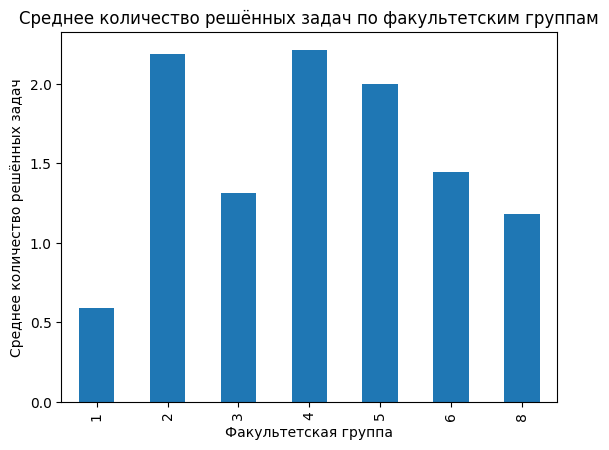

In [ ]:
faculty_group_avg = merged_data.groupby('group_faculty')['Solved'].mean()
faculty_group_avg.plot(kind='bar', title='Среднее количество решённых задач по факультетским группам')
plt.xlabel('Факультетская группа')
plt.ylabel('Среднее количество решённых задач')

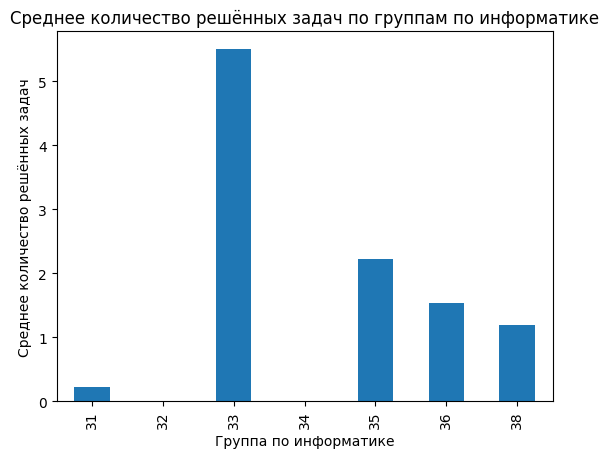

In [19]:
informatics_group_avg = merged_data.groupby('group_out')['Solved'].mean()
informatics_group_avg.plot(kind='bar', title='Среднее количество решённых задач по группам по информатике')
plt.xlabel('Группа по информатике')
plt.ylabel('Среднее количество решённых задач')
plt.show()

In [ ]:
merged_data[(merged_data["G"]>10) | (merged_data["H"]>10)]

,login,group_faculty,group_out,Place,A,B,C,D,E,F,G,H,Solved,Score
21,r0300205,2,33,1,9.0,10.0,19.0,20.0,20.0,30.0,30.0,49.0,8,187
22,r0300206,2,33,2,10.0,3.0,20.0,20.0,20.0,30.0,30.0,49.0,7,182
25,r0300209,2,33,5,8.0,10.0,14.0,20.0,20.0,30.0,0.0,30.0,5,132
28,r0300212,2,36,20-21,10.0,3.0,20.0,NaN,20.0,NaN,NaN,20.0,3,73
33,r0300301,3,35,24,9.0,5.0,NaN,NaN,NaN,23.0,8.0,23.0,1,68
46,r0300314,3,33,4,9.0,9.0,20.0,20.0,20.0,30.0,9.0,20.0,6,137
61,r0300414,4,33,12,10.0,6.0,20.0,20.0,NaN,30.0,NaN,15.0,4,101
70,r0300508,5,33,3,10.0,10.0,20.0,20.0,20.0,30.0,29.0,NaN,7,139
73,r0300511,5,35,18,9.0,9.0,NaN,NaN,NaN,30.0,NaN,29.0,3,77
76,r0300514,5,33,7,10.0,10.0,13.0,18.0,NaN,30.0,NaN,30.0,4,111
